## **Project Goal**: Analyze keyword dataset. Filter keywords based on specific metrics.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load csv file into a dataframe
df = pd.read_csv('/content/near_me_Keyword Stats 2023-05-28 at 01_17_40 - near_me_Keyword Stats 2023-05-28 at 01_17_40.csv')
df.sample(5)

,Keyword,Avg. monthly searches,Competition,Top of page bid (low range),Top of page bid (high range)
516,professional accountant near me,50.0,Unknown,NaN,NaN
656,vita tax sites near me,50.0,Low,NaN,NaN
350,best taxes near me,50.0,Low,7.67,34.66
418,tax and financial services near me,50.0,Low,NaN,NaN
208,prepare taxes near me,50.0,Medium,2.66,15.61


### **Explore Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       868 non-null    object 
 1   Avg. monthly searches         861 non-null    float64
 2   Competition                   868 non-null    object 
 3   Top of page bid (low range)   207 non-null    float64
 4   Top of page bid (high range)  207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 34.0+ KB


In [4]:
# rename columns
df = df.rename(columns={"Top of page bid (low range)": "low bid", "Top of page bid (high range)": "high bid", "Avg. monthly searches": "ams"})
df.head()

,Keyword,ams,Competition,low bid,high bid
0,taxes near me,5000.0,Low,7.56,31.89
1,tax places near me,5000.0,Low,5.49,21.97
2,tax consultant near me,500.0,Low,5.56,26.89
3,tax professional near me,500.0,Low,6.96,32.71
4,tax advisor near me,500.0,Low,7.35,27.70


In [5]:
# inspect for null values
df.isnull().sum()

Keyword          0
ams              7
Competition      0
low bid        661
high bid       661
dtype: int64

In [6]:
# check for data distribution and skewness
df['low bid'].median()

4.76

In [7]:
df['high bid'].median()

21.91

In [8]:
# check for duplicate data
df.duplicated().sum()

0

In [9]:
# drop null from ams column
df.dropna(subset = ['ams'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 867
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Keyword      861 non-null    object 
 1   ams          861 non-null    float64
 2   Competition  861 non-null    object 
 3   low bid      207 non-null    float64
 4   high bid     207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 40.4+ KB


In [10]:
# inspect descriptive statistics
df.describe()

,ams,low bid,high bid
count,861.000000,207.000000,207.000000
mean,100.813008,5.136860,24.538309
std,450.406058,3.047354,16.671896
min,0.000000,0.170000,0.790000
25%,50.000000,2.940000,14.695000
50%,50.000000,4.760000,21.910000
75%,50.000000,6.775000,28.975000
max,5000.000000,18.210000,134.760000


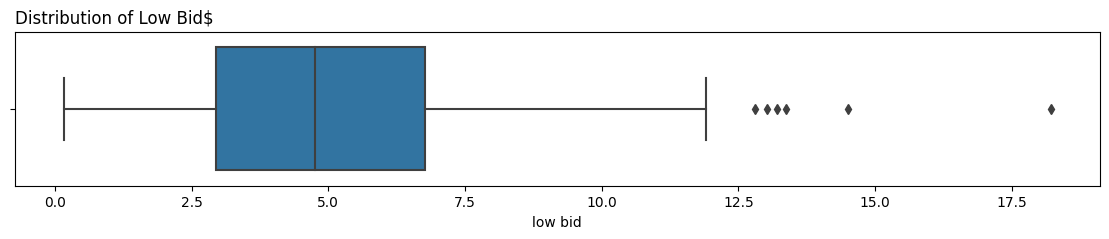

In [11]:
# plot box and whisker plot to inspect data distribution
plt.figure(figsize=(14,2))

sns.boxplot(data=df, x='low bid')

plt.title('Distribution of Low Bid$', loc='left')
plt.show()

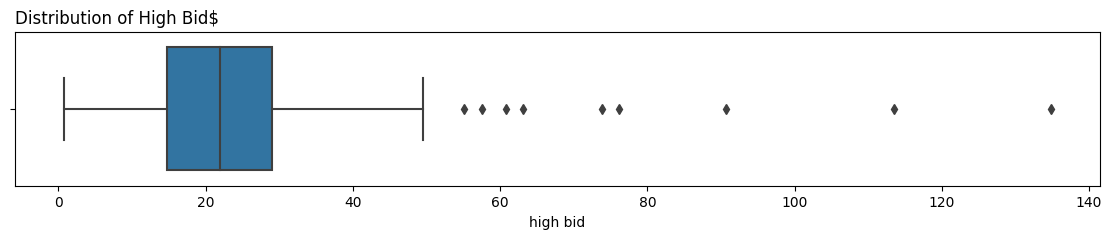

In [12]:
plt.figure(figsize=(14,2))

sns.boxplot(data=df, x='high bid')

plt.title('Distribution of High Bid$', loc='left')
plt.show()

Observation: The data is skewed to the left, not evenly. Replace NAN values with median values instead of mean.

In [13]:
# replace NAN with median values
df['low bid'] = df['low bid'].fillna(df['low bid'].median())

In [14]:
df['high bid'] = df['high bid'].fillna(df['high bid'].median())

In [15]:
# confirming replacement
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 867
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Keyword      861 non-null    object 
 1   ams          861 non-null    float64
 2   Competition  861 non-null    object 
 3   low bid      861 non-null    float64
 4   high bid     861 non-null    float64
dtypes: float64(3), object(2)
memory usage: 40.4+ KB


In [16]:
# inspecting sample of dataframe
df.sample(5)

,Keyword,ams,Competition,low bid,high bid
185,best tax person near me,50.0,Medium,4.27,28.27
245,independent tax advisor near me,50.0,Medium,4.76,21.91
616,tax properties near me,50.0,Medium,4.76,21.91
617,reputable cpa near me,50.0,Medium,4.76,21.91
264,cpa for owner operators near me,50.0,Unknown,4.76,21.91


In [17]:
# reinspect descriptive stat after data wrangling 
df.describe()

,ams,low bid,high bid
count,861.000000,861.000000,861.000000
mean,100.813008,4.850604,22.541893
std,450.406058,1.500125,8.236639
min,0.000000,0.170000,0.790000
25%,50.000000,4.760000,21.910000
50%,50.000000,4.760000,21.910000
75%,50.000000,4.760000,21.910000
max,5000.000000,18.210000,134.760000


### Analysis

### **Ad Group 1**

In [18]:
# filter keywords by ams = 5000
# sort the new dataframe
df1 = df.loc[df['ams'] == 5000]
df1

sorted_data = df1.sort_values(by='low bid', ascending=False)
sorted_data

,Keyword,ams,Competition,low bid,high bid
7,accountants near me,5000.0,Low,8.52,57.48
0,taxes near me,5000.0,Low,7.56,31.89
6,cpa near me,5000.0,Low,6.55,24.98
11,tax accountant near me,5000.0,Low,6.00,27.97
9,tax services near me,5000.0,Low,5.77,20.01
1,tax places near me,5000.0,Low,5.49,21.97
8,tax preparer near me,5000.0,Low,4.12,18.44


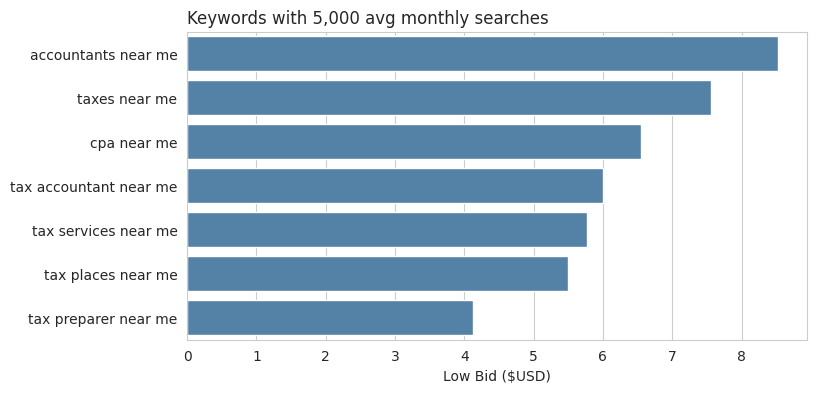

In [28]:
# create data visulization of the filtered data based on low bid
# first set of keywords ad group

sns.set_style("whitegrid")
plt.figure(figsize=(8,4))

sns.barplot(x='low bid', y='Keyword', data=sorted_data, color='steelblue')

plt.title('Keywords with 5,000 avg monthly searches', loc='left')
plt.ylabel('')

plt.xlabel('Low Bid ($USD)')

plt.show()

### **Ad Group 2**

In [29]:
# filter keywords by ams = 500

df2 = df.loc[df['ams'] == 500]
df2

,Keyword,ams,Competition,low bid,high bid
2,tax consultant near me,500.0,Low,5.56,26.89
3,tax professional near me,500.0,Low,6.96,32.71
4,tax advisor near me,500.0,Low,7.35,27.70
5,tax help near me,500.0,Medium,7.76,26.80
10,tax office near me,500.0,Low,3.99,20.39
13,best cpa near me,500.0,Low,3.53,16.98
14,tax agent near me,500.0,Low,6.96,21.07
15,tax filing near me,500.0,Low,7.01,29.00
16,best tax service near me,500.0,Low,4.53,23.37
17,income tax near me,500.0,Low,4.56,17.60


In [30]:
# sort the new dataframe
sorted = df2.sort_values(by='low bid', ascending=False)
sorted.head()

,Keyword,ams,Competition,low bid,high bid
66,tax specialists near me,500.0,Low,9.53,39.41
5,tax help near me,500.0,Medium,7.76,26.80
4,tax advisor near me,500.0,Low,7.35,27.70
21,tax experts near me,500.0,Low,7.21,26.81
15,tax filing near me,500.0,Low,7.01,29.00


In [32]:
# filter the dataframe further by low bid below $5
df3 = df2.loc[df2['low bid'] < 5]
df3

,Keyword,ams,Competition,low bid,high bid
10,tax office near me,500.0,Low,3.99,20.39
13,best cpa near me,500.0,Low,3.53,16.98
16,best tax service near me,500.0,Low,4.53,23.37
17,income tax near me,500.0,Low,4.56,17.60
20,income tax service near me,500.0,Low,2.74,16.90
23,tax cpa near me,500.0,Low,4.05,25.93
27,income tax preparer near me,500.0,Low,2.63,13.72
29,tax preparation services near me,500.0,Low,3.77,22.54
31,cpa near me for taxes,500.0,Low,4.29,27.68
32,best tax preparer near me,500.0,Low,3.11,19.14


In [34]:
# second set of keywords ad group
# sort the data by high bid

sortdf3 = df3.sort_values(by='high bid', ascending=False)
sortdf3.head()

,Keyword,ams,Competition,low bid,high bid
31,cpa near me for taxes,500.0,Low,4.29,27.68
23,tax cpa near me,500.0,Low,4.05,25.93
16,best tax service near me,500.0,Low,4.53,23.37
29,tax preparation services near me,500.0,Low,3.77,22.54
10,tax office near me,500.0,Low,3.99,20.39


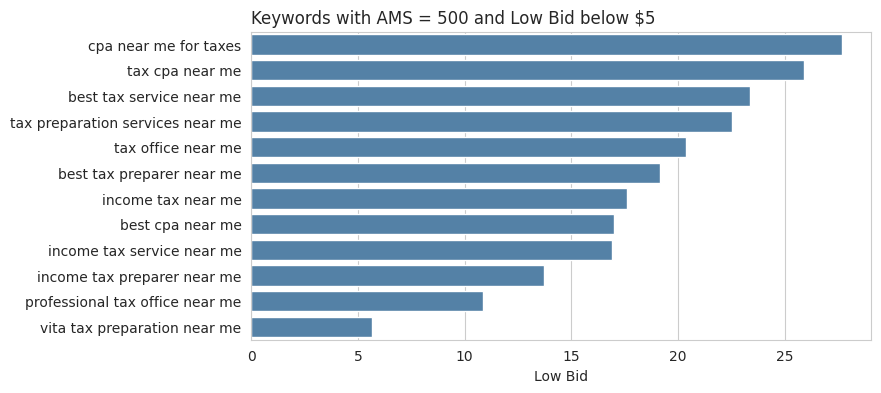

In [35]:
# create data visulization of the second set of keywords ad group

sns.set_style("whitegrid")
plt.figure(figsize=(8,4))

sns.barplot(x='high bid', y='Keyword', data=sortdf3, color='steelblue')

plt.title('Keywords with AMS = 500 and Low Bid below $5', loc='left', fontsize='12')
plt.ylabel('')

plt.xlabel('Low Bid')

plt.show()

In [38]:
# check range of high bid and low bid for the second keywords ad group 
sortdf3.describe()

,ams,low bid,high bid
count,12.0,12.000000,12.000000
mean,500.0,3.525833,18.396667
std,0.0,1.107729,6.289838
min,500.0,0.710000,5.670000
25%,500.0,3.017500,16.105000
50%,500.0,3.880000,18.370000
75%,500.0,4.317500,22.747500
max,500.0,4.560000,27.680000
